In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install matplotlib_dashboard


In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno
import scipy.stats as stats
from matplotlib_dashboard import MatplotlibDashboard

import re
import random
import string
import requests
import tempfile

from PIL import Image
from tqdm.notebook import tqdm
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# memory management and garbage collection
import gc
gc.collect()

8

In [ ]:


     df0 = pd.read_csv('/content/drive/MyDrive/Women.csv', encoding="utf-8")
df = df0.copy()
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# Remove the column: 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# drop all non values
df.dropna(inplace=True)

In [ ]:
# reseat the index after droping some rows
df.reset_index(drop=True, inplace=True)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
# to remove spaces in columns and replace them with underscore
df.columns= df.columns.str.replace(" ", "_")

In [ ]:
df.head()

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [ ]:
df = pd.DataFrame(df[["Review_Text", "Recommended_IND"]].values, columns=['text', 'recommended'])
df.head()

,text,recommended
0,I had such high hopes for this dress and reall...,0
1,"I love, love, love this jumpsuit. it's fun, fl...",1
2,This shirt is very flattering to all due to th...,1
3,"I love tracy reese dresses, but this one is no...",0
4,I aded this in my basket at hte last mintue to...,1


In [ ]:
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df

,text,recommended,not_recommended
0,I had such high hopes for this dress and reall...,0,1
1,"I love, love, love this jumpsuit. it's fun, fl...",1,0
2,This shirt is very flattering to all due to th...,1,0
3,"I love tracy reese dresses, but this one is no...",0,1
4,I aded this in my basket at hte last mintue to...,1,0
...,...,...,...
19657,I was very happy to snag this dress at such a ...,1,0
19658,"It reminds me of maternity clothes. soft, stre...",1,0
19659,"This fit well, but the top was very see throug...",0,1
19660,I bought this dress for a wedding i have this ...,1,0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download("punkt")
nltk.download('stopwords')

# Your other imports...

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**BERT** **Modeling**

In [ ]:
# !pip install transformers -Uq
from transformers import AutoTokenizer, AutoModel, TFAutoModel, AutoConfig
from transformers import pipeline

In [ ]:
 # Remove Puncs
# X = df['text'].map(lambda text: text.translate(str.maketrans('', '', string.punctuation))).values

X = df['text'].values
y = df['not_recommended'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

# all not_recommended reviews we will check finally
X_test = df[df['not_recommended'] == 1]['text']

X_train.shape, X_val.shape, X_test.shape,

((17695,), (1967,), (3575,))

In [ ]:
display(pd.value_counts(y_train), np.bincount(y_train))

0    14478
1     3217
dtype: int64

array([14478,  3217])

**Define** **Tokenizer** - **Tokenization** and **Sequencing**

In [ ]:
from transformers import AutoTokenizer

# bert cased or uncased
model_name = "bert-base-uncased"
# model_name = "bert-large-uncased"
# model_name = "bert-large-uncased-whole-word-masking-finetuned-squad"

# model_name = "microsoft/deberta-v2-xxlarge"

tokenizer  = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Tokenize the text and add `[CLS]` and `[SEP]` tokens.
doc_token_length = np.array([len(tokenizer.encode(sent, add_special_tokens=True)) for sent in tqdm(X)])
print('Max sentence length: ', max(doc_token_length))

  0%|          | 0/19662 [00:00<?, ?it/s]

Max sentence length:  162


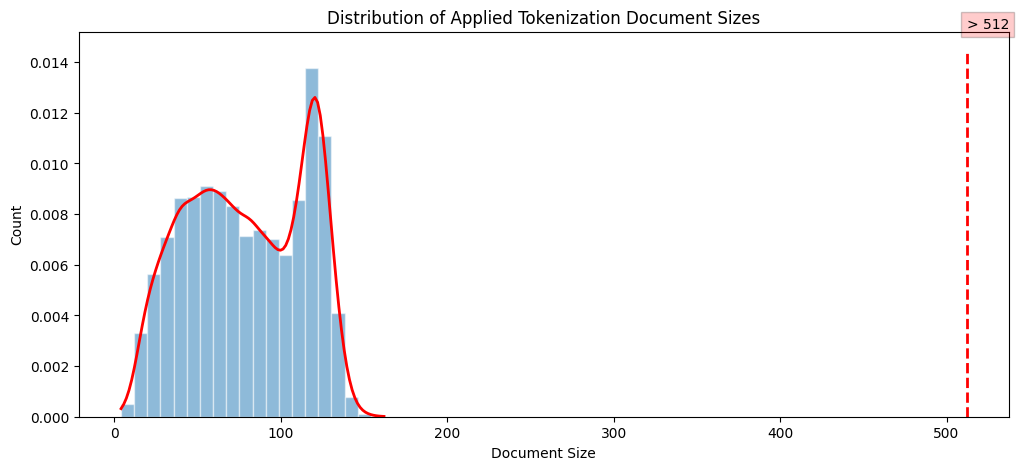

In [ ]:
from scipy.stats import gaussian_kde

max_doc_token_length = 512

# Create the histogram
plt.figure(figsize=(12, 5))
plt.hist(doc_token_length, bins=20, density=True, edgecolor='w', alpha=0.5)
# sns.histplot(x=doc_token_length, stat='count', discrete=True, kde=True, color='dodgerblue')
# sns.histplot(x=pd.Series(doc_token_length)[pd.Series(doc_token_length) > max_doc_token_length], stat='count', discrete=True, color='r')
plt.title("Distribution of Applied Tokenization Document Sizes")
plt.xlabel("Document Size")
plt.ylabel("Count")

# Estimate the kernel density
kde = gaussian_kde(doc_token_length)
x_grid = np.linspace(min(doc_token_length), max(doc_token_length), 100)
plt.plot(x_grid, kde(x_grid), color='red', linewidth=2)


plt.vlines(x=max_doc_token_length, ymin=0, ymax=plt.ylim()[1], colors ="r", ls ="dashed", lw=2)
plt.text(x=max_doc_token_length, y=plt.ylim()[1], s=f'> {max_doc_token_length}', ha='left', va='bottom',rotation='horizontal',
         fontsize=10, backgroundcolor='white', bbox=dict(facecolor='red', alpha=0.2))

plt.show()


In [ ]:
if max(doc_token_length) < 512:
    max_doc_token_length = max(doc_token_length)

print(max_doc_token_length)

round(sum(np.array(doc_token_length) < max_doc_token_length) / len(doc_token_length), ndigits=2)

162


1.0

**Apply** **Tokenizer** ( **Transformation** **text** to TENSOR ) - **Padding** **bold text**

In [ ]:
labels_train = y_train.reshape(-1, 1)
labels_val   = y_val.reshape(-1, 1)

labels_train.shape, labels_val.shape

((17695, 1), (1967, 1))

In [ ]:
def transformation(X, seq_len):
    # initialize empty zero arrays
    Xids  = np.zeros((len(X), seq_len))
    Xmask = np.zeros((len(X), seq_len))

    for i, sentences in enumerate(X):
        # Tokenize all of the sentences and map the tokens to their word IDs.
        tokens = tokenizer.encode_plus(
            text=sentences,                # Sentence to encode.
            add_special_tokens=True,       # Add [CLS] and [SEP]
            max_length = seq_len,          # maximum length of a sentence - Pad & truncate all sentences
            pad_to_max_length=True,        # Add [PAD]s
            return_attention_mask = True,  # Generate the attention mask
            padding = 'max_length',
            truncation = True,             # Explicitely truncate sentences to max length. 'only_first' or 'only_second'
#             stride = 64                  # specifies the number of tokens to skip between two consecutive windows of text
#             return_tensors = 'pt',       # ask the function to return PyTorch tensors
        )
        # assign tokenized outputs to respective rows in numpy arrays
        Xids[i]  = tokens['input_ids']
        Xmask[i] = tokens['attention_mask']
    return Xids, Xmask

Xids_train, Xmask_train = transformation(X_train, max_doc_token_length)
Xids_val,   Xmask_val   = transformation(X_val, max_doc_token_length)
Xids_test,  Xmask_test  = transformation(X_test, max_doc_token_length)

print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print()
print("Xids_val.shape    :", Xids_val.shape)
print("Xmask_val.shape   :", Xmask_val.shape)
print()
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (17695, 162)
Xmask_train.shape : (17695, 162)

Xids_val.shape    : (1967, 162)
Xmask_val.shape   : (1967, 162)

Xids_test.shape   : (3575, 162)
Xmask_test.shape  : (3575, 162)


**Transformation** **Matrix** to **Tensor¶**

In [ ]:
import tensorflow as tf


In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_val   = tf.data.Dataset.from_tensor_slices((Xids_val,   Xmask_val,   labels_val))
dataset_test  = tf.data.Dataset.from_tensor_slices((Xids_test,  Xmask_test))

dataset_train, dataset_val, dataset_test

(<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None))>)

In [ ]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

def map_func_no_label(Xids, Xmask):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}

# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_val   = dataset_val.map(map_func)
dataset_test  = dataset_test.map(map_func_no_label)

dataset_train, dataset_val, dataset_test

(<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec={'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}>)

In [ ]:
# it's important, if raise error memory size reduce batch size
batch_size = 64 # 16, 32

# If you set drop_remainder=True, then this last batch would be dropped
train_ds = dataset_train.batch(batch_size).prefetch(tf.data.AUTOTUNE)          # Using for metrics calculations
val_ds   = dataset_val.batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds  = dataset_test.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds2 = dataset_train.shuffle(buffer_size = len(X_train), reshuffle_each_iteration=True).batch(batch_size).prefetch(tf.data.AUTOTUNE)

**Define** & **Train** **BERT** **Model**

In [ ]:
print(f'Model Name:\t{model_name}', f'\nSentence Len:\t{max_doc_token_length}')

# way-1
def build_classifier_model(
    model_name: str     = model_name,
    seq_length: int     = max_doc_token_length,
) -> tf.keras.models.Model:
    import tensorflow as tf
    from transformers import TFAutoModel, AutoModel, AutoConfig

    # Download model and configuration from huggingface.co and cache.
    model          = TFAutoModel.from_pretrained(model_name)

    # Two inputs
    input_ids      = tf.keras.layers.Input(shape=(seq_length,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(seq_length,), name='attention_mask', dtype='int32')

    # Get the last hidden state from BertModel output for LSTM-GRU
    last_hidden_state = model.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state

    # Bidirectional LSTM-GRU - reduce Word Embedding size from 768 to 768*2 - Output shape change return_sequences=True
    x = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(768, return_sequences=True,
                                                          dropout=0.2, recurrent_dropout=0.2))(last_hidden_state)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.GRU(768, return_sequences=False, dropout=0.2)(x)


#     pooler_output = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]
#     pooled_output = model.deberta(input_ids=input_ids, attention_mask = attention_mask)[0]          # model name = like deberta
#     pooled_output = tf.reduce_mean(pooled_output, axis=1)


    # Prediction - last_hidden_state or use bert pooler_output
    x = tf.keras.layers.Dense(512, activation='selu', kernel_regularizer=tf.keras.regularizers.l1())(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(256, activation='softsign')(x)              # tf.keras.layers.LeakyReLU(alpha=0.3)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(128, activation=tf.keras.layers.PReLU())(x) # 'elu', 'gelu',
    x = tf.keras.layers.Dropout(0.2)(x)

    # Prediction Dense
    y = tf.keras.layers.Dense(units=1, activation='sigmoid', name='outputs')(x)

    model = tf.keras.Model(inputs = [input_ids, attention_mask], outputs = y,
                            name=f'{model_name}-BERT-BinaryLabel')

    # define the metrics
    METRICS = [
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
#         tf.keras.metrics.F1Score(threshold=0.50),     # tf-nightly
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.AUC(curve='ROC', name='auc'),  # Balanced optimizing the overall accuracy
        tf.keras.metrics.AUC(curve='PR',  name='prc'),  # Imbalanced optimizing the precision-recall
#         tf.keras.metrics.TruePositives(name='tp'),
#         tf.keras.metrics.FalsePositives(name='fp'),
#         tf.keras.metrics.TrueNegatives(name='tn'),
#         tf.keras.metrics.FalseNegatives(name='fn'),
    ]
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=1e-6),  # tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0),
                  loss      = tf.keras.losses.BinaryCrossentropy(),
                  metrics   = METRICS,
                  # weighted_metrics = [tf.keras.metrics.Recall()]
    )
    return model

Model Name:	bert-base-uncased 
Sentence Len:	162


In [ ]:
tf.keras.backend.clear_session()

# Removed the lines related to strategy

model = build_classifier_model()
model.summary()



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "bert-base-uncased-BERT-BinaryLabel"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7          

In [ ]:
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)



In [ ]:
tf.keras.backend.clear_session()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max",
                           verbose = 1, patience = 2, restore_best_weights=True)

In [ ]:
%%time
history = model.fit(train_ds2, validation_data = val_ds, #validation_split = 0.2,
                    batch_size = 32, epochs = 2, callbacks=[early_stop], verbose = 1, class_weight = {0:1, 1:4})

Epoch 1/2


ResourceExhaustedError: ignored

In [ ]:
model.save('sentiment_analysis_bert_model.h5')
model.save_weights('sentiment_analysis_bert_model_weights.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Model** **evaluation**

In [ ]:
summary_bert = pd.DataFrame(model.history.history)
summary_bert.tail()

""


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_val_pred = (model.predict(val_ds, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = (model.predict(train_ds, verbose=0) >= 0.5).astype("int32")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
[[   0 1609]
 [   0  358]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1609
           1       0.18      1.00      0.31       358

    accuracy                           0.18      1967
   macro avg       0.09      0.50      0.15      1967
weighted avg       0.03      0.18      0.06      1967

-------------------------------------------------------
TRAIN


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[    5 14473]
 [    2  3215]]
              precision    recall  f1-score   support

           0       0.71      0.00      0.00     14478
           1       0.18      1.00      0.31      3217

    accuracy                           0.18     17695
   macro avg       0.45      0.50      0.15     17695
weighted avg       0.62      0.18      0.06     17695



In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Your existing code
y_val_proba = model.predict(val_ds, verbose=0)
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)



In [ ]:
# BEST THRESHOLD calculate precision-recall curve
y_val_proba = model.predict(val_ds, verbose=0)
# Create the Precision Recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)

# calculate F1 score
fscore = np.divide((2 * precision * recall), (precision + recall), out=None, where=(precision*recall)!=0) #only divide nonzeros else None
# locate the index of the largest f score
idx = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[idx], fscore[idx]))

# calculate precision-recall AUC
auc_1 = auc(recall, precision)
print("auc :", auc_1)

Best Threshold=0.526323, F-Score=0.308
auc : 0.16324889228260014


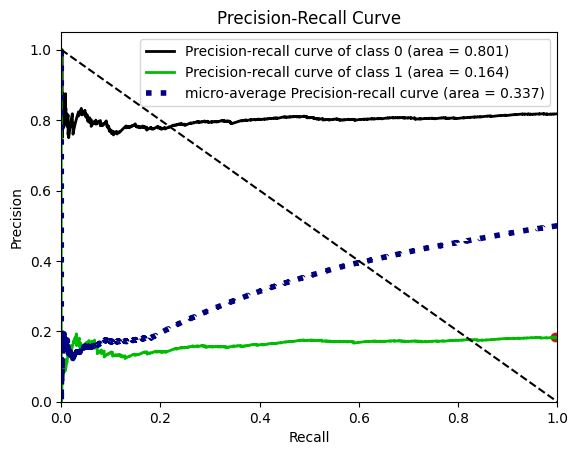

In [ ]:
!pip install scikit-plot -q
import scikitplot as skplt

# val dataset not shuffle so use y_val for true label
y_val_proba = model.predict(val_ds, verbose=0)
skplt.metrics.plot_precision_recall(y_val, np.hstack([(1-y_val_proba), y_val_proba]));
# skplt.metrics.plot_roc(y_test, y_prob_test)
plt.scatter(recall[idx], precision[idx], marker='o', color='firebrick', label='Best')
plt.plot([0, 1],[1, 0], 'k--')
plt.show()


In [ ]:
# use BEST THRESHOLD thresholds[idx]

# Get true labels and predictions for validation set as Batch
y_val, y_val_prob = [[] for _ in range(2)]

for X_batch, y_batch in tqdm(val_ds):
    y_val      += y_batch.numpy().tolist()
    y_val_prob += model.predict_on_batch(X_batch).squeeze().tolist()

y_val, y_val_pred = np.array(y_val), (np.array(y_val_prob) >= thresholds[idx]).astype("int32")


# Get true labels and predictions for train set as Batch
y_train, y_train_prob = [[] for _ in range(2)]

for X_batch, y_batch in tqdm(train_ds):
    y_train      += y_batch.numpy().tolist()
    y_train_prob += model.predict_on_batch(X_batch).squeeze().tolist()

y_train, y_train_pred = np.array(y_train), (np.array(y_train_prob) >= thresholds[idx]).astype("int32")


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, auc

print('TEST')
print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, zero_division=0))
print("-------------------------------------------------------")
print('TRAIN')
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, zero_division=0))

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/277 [00:00<?, ?it/s]

TEST
[[  14 1595]
 [   3  355]]
              precision    recall  f1-score   support

           0       0.82      0.01      0.02      1609
           1       0.18      0.99      0.31       358

    accuracy                           0.19      1967
   macro avg       0.50      0.50      0.16      1967
weighted avg       0.71      0.19      0.07      1967

-------------------------------------------------------
TRAIN
[[   94 14384]
 [   23  3194]]
              precision    recall  f1-score   support

           0       0.80      0.01      0.01     14478
           1       0.18      0.99      0.31      3217

    accuracy                           0.19     17695
   macro avg       0.49      0.50      0.16     17695
weighted avg       0.69      0.19      0.07     17695



In [ ]:
H = history.history

# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Plot loss and validation loss
axs[0].plot(H['loss'], label='loss')
axs[0].plot(H['val_loss'], label='val_loss')
axs[0].set_xlabel('epochs')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss & Val_Loss Score')
axs[0].legend()

# Plot accuracy and validation accuracy
axs[1].plot(H['accuracy'], label='accuracy')
axs[1].plot(H['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Accuracy & Val_Accuracy Score')
axs[1].legend()

# Plot precision-recall curve and validation precision-recall curve
axs[2].plot(H['prc'], label='prc')
axs[2].plot(H['val_prc'], label='val_prc')
axs[2].set_xlabel('epochs')
axs[2].set_ylabel('PRC')
axs[2].set_title('PRC & Val_PRC Score')
axs[2].legend()

plt.tight_layout()
plt.show()


NameError: ignored

In [ ]:
def get_average_metrics_batch_dataset(dataset, thresholds=0.5):
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

    # initialize empty lists to store the results
    precision_list, recall_list, f1_list, accuracy_list, auc_list = [[] for _ in range(5)]

    # iterate through the batch dataset
    for X_batch, y_batch in tqdm(dataset):
        # Perform some operation on the current batch
        # test probability
        y_prob = model.predict_on_batch(X_batch)
        # test predicted label
        y_pred = (y_prob >= thresholds).astype("int32")

        precision_list.append(precision_score(y_batch, y_pred))
        recall_list.append(recall_score(y_batch, y_pred))
        f1_list.append(f1_score(y_batch, y_pred))
        accuracy_list.append(accuracy_score(y_batch, y_pred))
        auc_list.append(roc_auc_score(y_batch, y_prob))

    # aggregate the results across all the batches
    precision = sum(precision_list) / len(precision_list)
    recall    = sum(recall_list)    / len(recall_list)
    f1        = sum(f1_list)        / len(f1_list)
    accuracy  = sum(accuracy_list)  / len(accuracy_list)
    auc       = sum(auc_list)       / len(auc_list)

    # print the evaluation metrics
    print('Precision: {:.2f}'.format(precision))
    print('Recall   : {:.2f}'.format(recall))
    print('F1 Score : {:.2f}'.format(f1))
    print('Accuracy : {:.2f}'.format(accuracy))
    print('AUC      : {:.2f}'.format(auc))

    # get list of test scores
    return [precision, recall, f1, accuracy, auc]

In [ ]:
# get list of test scores
val_score_list = get_average_metrics_batch_dataset(val_ds, thresholds=thresholds[idx])

  0%|          | 0/31 [00:00<?, ?it/s]

Precision: 0.18
Recall   : 0.99
F1 Score : 0.31
Accuracy : 0.19
AUC      : 0.46


In [ ]:
# get list of test scores
train_score_list = get_average_metrics_batch_dataset(train_ds, thresholds=thresholds[idx])

  0%|          | 0/277 [00:00<?, ?it/s]

Precision: 0.18
Recall   : 0.99
F1 Score : 0.30
Accuracy : 0.19
AUC      : 0.46


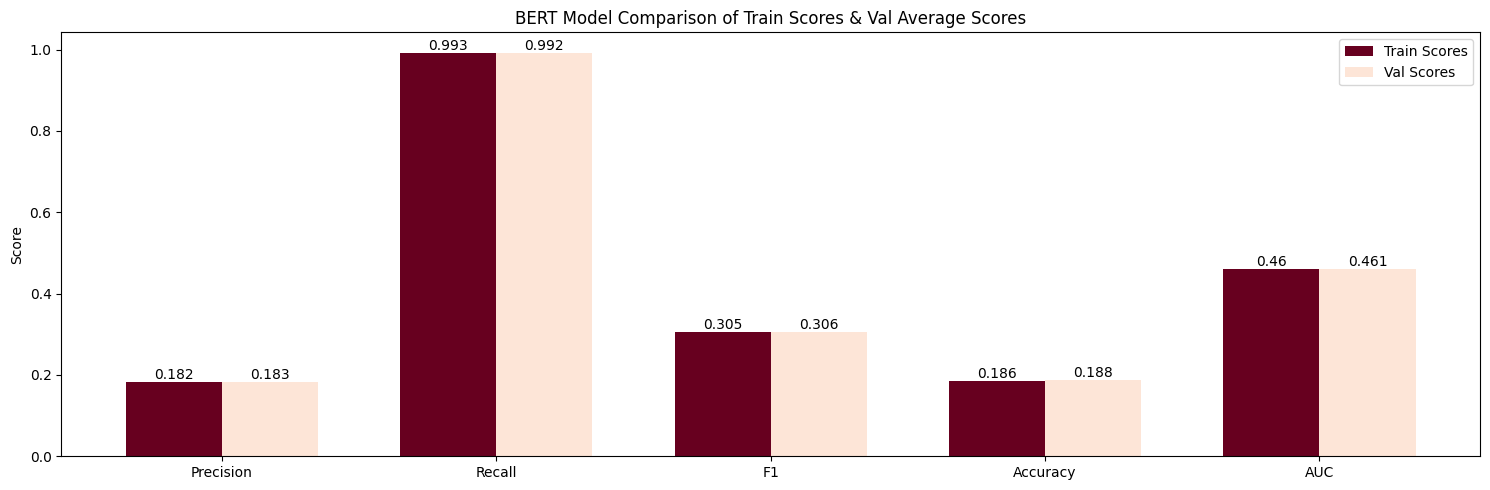

In [ ]:
score_name = ['Precision', 'Recall', 'F1', 'Accuracy', 'AUC']
bar_width  = 0.35
index = np.arange(len(score_name))

fig, ax = plt.subplots(figsize=(15, 5))

# Plot the bars for train scores
ax.bar(index, train_score_list, bar_width, label='Train Scores', color='#67001f')

# Plot the bars for validation scores
ax.bar(index + bar_width, val_score_list, bar_width, label='Val Scores', color='#fddbc7', alpha=0.7)

# Add text labels on top of the bars
for i, train_score in enumerate(train_score_list):
    ax.text(i, train_score, str(round(train_score, 3)), ha='center', va='bottom')

for i, val_score in enumerate(val_score_list):
    ax.text(i + bar_width, val_score, str(round(val_score, 3)), ha='center', va='bottom')

# Set the x-axis tick labels
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(score_name)

# Set the y-axis label
ax.set_ylabel('Score')

# Set the title and legend
ax.set_title('BERT Model Comparison of Train Scores & Val Average Scores')
ax.legend()

plt.tight_layout()
plt.show();

**Predict** **Teast** Data , i.**e**. **All** **Unrecommended** **Rewiews¶**

In [ ]:
model_bert = tf.keras.models.load_model('sentiment_analysis_bert_model.h5', custom_objects={'CustomModel': build_classifier_model()})
model_bert

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# TEST data all not_recommended reviews
y_test_prob = model_bert.predict(test_ds)
y_test_pred = (y_test_prob >= thresholds[idx]).astype("int32").reshape(-1)

(neg, pos), total = np.bincount(y_test_pred), sum(np.bincount(y_test_pred))

print('Examples:\n    Total: {}\n    Detection UnRecommended Rewiew: {} ({:.2f}% of total)\n'.format(total, pos, 100 * pos / total))

56/56 [==============================] - 30s 463ms/step
Examples:
    Total: 3575
    Detection UnRecommended Rewiew: 3550 (99.30% of total)



In [ ]:
# sample new review series - not_recommended
submission_df = df[df['not_recommended'] == 1]['text'].head(2)

# let's see if new reviews are not recommended
Xids_rewiew, Xmask_train = transformation(submission_df, max_doc_token_length)
dataset_new_rewiew       = tf.data.Dataset.from_tensor_slices((Xids_rewiew, Xmask_train))
new_rewiew_ds            = dataset_new_rewiew.map(map_func_no_label).batch(1)

# assign predict as DataFrame
submission_df                    = submission_df.to_frame('text')
submission_df['not_recommended'] = model.predict(new_rewiew_ds, verbose=0) >= thresholds[idx]
submission_df

,text,not_recommended
0,I had such high hopes for this dress and reall...,True
3,"I love tracy reese dresses, but this one is no...",True


from matplotlib import pyplot as plt
import seaborn as sns
submission_df.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)